In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Oreilly\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [5]:
df.drop(['Time'], axis=1, inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

import autosklearn as ask

#ask.regression.AutoSklearnRegressor() for regression tasks
model = ask.classification.AutoSklearnClassifier(ensemble_size=10, #size of the end ensemble (minimum is 1)
                                                 time_left_for_this_task=120, #the number of seconds the process runs for
                                                 per_run_time_limit=30) #maximum seconds allocated per model
model.fit(X_train, y_train) #begin fitting the search model
print(model.sprint_statistics()) #print statistics for the search
y_predictions = model.predict(X_test) #get predictions from the model

In [42]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(X_train, y_train)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.12 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(input_matrix)


TPOTClassifier(max_time_mins=10, verbosity=2)

In [43]:
tpot.fitted_pipeline_

Pipeline(steps=[('gaussiannb', GaussianNB())])

In [44]:
tpot.score(X_test, y_test)

0.9777700388879216

In [45]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=20)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


24.08 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=4, min_samples_split=8, n_estimators=100)


TPOTClassifier(max_time_mins=20, verbosity=2)

In [46]:
tpot.fitted_pipeline_

Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.35000000000000003,
                                      min_samples_leaf=4,
                                      min_samples_split=8))])

In [47]:
tpot.score(X_test, y_test)

0.9993760520053399

In [48]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=30)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


32.70 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=2, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.4, verbosity=0)


TPOTClassifier(max_time_mins=30, verbosity=2)

In [49]:
tpot.fitted_pipeline_

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=17, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.4, tree_method='exact',
                               validate_parameters=1, verbosity=0))])

In [50]:
tpot.score(X_test, y_test)

0.9991583957281328

In [3]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 2)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.311-b11, mixed mode)
  Starting server from c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HP\AppData\Local\Temp\tmpykzr684z
  JVM stdout: C:\Users\HP\AppData\Local\Temp\tmpykzr684z\h2o_HP_started_from_python.out
  JVM stderr: C:\Users\HP\AppData\Local\Temp\tmpykzr684z\h2o_HP_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months and 2 days
H2O_cluster_name:,H2O_from_python_HP_sigzz9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [4]:
data = h2o.import_file(r'C:\Users\HP\Desktop\Oreilly\creditcard.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
data['Class'] = data['Class'].asfactor()  #encode the binary repsonse as a factor
data['Class'].levels()  #optional: after encoding, this shows the two factor levels, '0' and '1'

[['0', '1']]

In [6]:
splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [7]:
y = 'Class'
x = list(data.columns)

x.remove(y)  #remove the response
x.remove('Time') 

In [9]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

glm_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_fit1')

glm_fit1.train(x=x, y=y, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_fit1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 2.622E-5 )",29,26,7,py_5_sid_8db8




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.0007797263919032201
RMSE: 0.027923581287206338
LogLoss: 0.004348819280540817
Null degrees of freedom: 199613
Residual degrees of freedom: 199587
Null deviance: 5179.772324860602
Residual deviance: 1736.1704237317476
AIC: 1790.1704237317476
AUC: 0.9805578212060134
AUCPR: 0.7194211020434615
Gini: 0.9611156424120268

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0628290454176523: 


,,0,1,Error,Rate
0,0,199173.0,88.0,0.0004,(88.0/199261.0)
1,1,71.0,282.0,0.2011,(71.0/353.0)
2,Total,199244.0,370.0,0.0008,(159.0/199614.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.062829,0.780083,196.0
1,max f2,0.040707,0.793520,215.0
2,max f0point5,0.148063,0.783025,168.0
3,max accuracy,0.065480,0.999208,193.0
4,max precision,0.999994,0.888889,0.0
5,max recall,0.000133,1.000000,391.0
6,max specificity,0.999994,0.999965,0.0
7,max absolute_mcc,0.062829,0.779901,196.0
8,max min_per_class_accuracy,0.001281,0.923513,341.0
9,max mean_per_class_accuracy,0.002598,0.938779,317.0



Gains/Lift Table: Avg response rate:  0,18 %, avg score:  0,18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,5.004095e-03,87.214550,87.214550,0.154231,0.134867,0.154231,0.134867,0.872521,0.872521,8621.454987,8621.454987,0.864045
1,2,0.020004,2.982977e-03,1.983142,44.609518,0.003507,0.003779,0.078888,0.069340,0.019830,0.892351,98.314192,4360.951850,0.873893
2,3,0.030003,2.201379e-03,1.133224,30.119840,0.002004,0.002552,0.053264,0.047081,0.011331,0.903683,13.322395,2911.984010,0.875228
3,4,0.040002,1.801377e-03,0.283306,22.661641,0.000501,0.001980,0.040075,0.035807,0.002833,0.906516,-71.669401,2166.164072,0.868048
4,5,0.050002,1.568793e-03,0.283306,18.186422,0.000501,0.001678,0.032161,0.028982,0.002833,0.909348,-71.669401,1718.642219,0.860869
5,6,0.100003,9.936013e-04,0.679866,9.433144,0.001202,0.001226,0.016682,0.015104,0.033994,0.943343,-32.013375,843.314422,0.844834
6,7,0.149999,7.427479e-04,0.396628,6.421173,0.000701,0.000855,0.011355,0.010355,0.019830,0.963173,-60.337162,542.117348,0.814614
7,8,0.200001,5.928911e-04,0.056656,4.830004,0.000100,0.000661,0.008541,0.007931,0.002833,0.966006,-94.334448,383.000413,0.767362
8,9,0.299999,4.272276e-04,0.141646,3.267244,0.000250,0.000500,0.005778,0.005454,0.014164,0.980170,-85.835410,226.724415,0.681376
9,10,0.400002,3.302832e-04,0.113311,2.478741,0.000200,0.000375,0.004383,0.004185,0.011331,0.991501,-88.668896,147.874112,0.592547




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-12-09 13:45:09,0.000 sec,0,2589.886162,0.012974,,,,,,,
1,,2021-12-09 13:45:09,0.698 sec,1,1305.525143,0.006572,,,,,,,
2,,2021-12-09 13:45:10,0.905 sec,2,1059.419770,0.005350,,,,,,,
3,,2021-12-09 13:45:10,1.109 sec,3,914.406387,0.004626,,,,,,,
4,,2021-12-09 13:45:10,1.326 sec,4,875.764104,0.004441,,,,,,,
5,,2021-12-09 13:45:10,1.502 sec,5,869.686777,0.004415,,,,,,,
6,,2021-12-09 13:45:10,1.661 sec,6,868.237539,0.004410,,,,,,,
7,,2021-12-09 13:45:11,1.820 sec,7,868.085212,0.004410,0.027924,0.004349,0.5583,0.980558,0.719421,87.21455,0.000797



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V4,0.815417,1.000000,0.211595
1,V14,0.579111,0.710202,0.150275
2,V10,0.532403,0.652921,0.138155
3,V22,0.298253,0.365767,0.077395
4,V13,0.274984,0.337231,0.071356
5,V8,0.227494,0.278991,0.059033
6,V21,0.207054,0.253924,0.053729
7,V16,0.186201,0.228351,0.048318
8,V9,0.116464,0.142827,0.030222
9,V20,0.103339,0.126732,0.026816



See the whole table with table.as_data_frame()


In [10]:
glm_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_fit2', lambda_search=True)
glm_fit2.train(x=x, y=y, training_frame=train, validation_frame=valid)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_fit2


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 8.007E-6 )","nlambda = 100, lambda.max = 0.02622, lambda.min = 8.007E-6, lambda...",29,27,149,py_5_sid_8db8




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.0007773442578185858
RMSE: 0.027880894135923723
LogLoss: 0.0043159351424083
Null degrees of freedom: 199613
Residual degrees of freedom: 199586
Null deviance: 5179.772324860602
Residual deviance: 1723.042155033379
AIC: 1779.042155033379
AUC: 0.9781484724868588
AUCPR: 0.7225462504346498
Gini: 0.9562969449737175

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06938709933744491: 


,,0,1,Error,Rate
0,0,199174.0,87.0,0.0004,(87.0/199261.0)
1,1,74.0,279.0,0.2096,(74.0/353.0)
2,Total,199248.0,366.0,0.0008,(161.0/199614.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.069387,0.776078,189.0
1,max f2,0.028385,0.790176,226.0
2,max f0point5,0.165002,0.784195,159.0
3,max accuracy,0.165002,0.999198,159.0
4,max precision,0.999972,0.902778,0.0
5,max recall,0.000041,1.000000,397.0
6,max specificity,0.999972,0.999965,0.0
7,max absolute_mcc,0.069387,0.775801,189.0
8,max min_per_class_accuracy,0.001223,0.920680,345.0
9,max mean_per_class_accuracy,0.002995,0.939150,314.0



Gains/Lift Table: Avg response rate:  0,18 %, avg score:  0,18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,5.162357e-03,86.931386,86.931386,0.153731,0.135868,0.153731,0.135868,0.869688,0.869688,8593.138575,8593.138575,0.861207
1,2,0.020004,3.072042e-03,2.549754,44.751136,0.004509,0.003889,0.079138,0.069895,0.025496,0.895184,154.975390,4375.113602,0.876731
2,3,0.030003,2.265078e-03,0.849918,30.119840,0.001503,0.002623,0.053264,0.047475,0.008499,0.903683,-15.008203,2911.984010,0.875228
3,4,0.040002,1.876969e-03,0.283306,22.661641,0.000501,0.002055,0.040075,0.036121,0.002833,0.906516,-71.669401,2166.164072,0.868048
4,5,0.050002,1.619983e-03,0.566612,18.243078,0.001002,0.001740,0.032261,0.029246,0.005666,0.912181,-43.338802,1724.307771,0.863707
5,6,0.100003,1.013158e-03,0.509900,9.376489,0.000902,0.001264,0.016582,0.015255,0.025496,0.937677,-49.010031,837.648870,0.839158
6,7,0.149999,7.450444e-04,0.339967,6.364516,0.000601,0.000866,0.011255,0.010459,0.016997,0.954674,-66.003281,536.451606,0.806100
7,8,0.200001,5.909492e-04,0.226622,4.830004,0.000401,0.000662,0.008541,0.008010,0.011331,0.966006,-77.337792,383.000413,0.767362
8,9,0.299999,4.143027e-04,0.084988,3.248358,0.000150,0.000493,0.005744,0.005504,0.008499,0.974504,-91.501246,224.835835,0.675700
9,10,0.400002,3.094843e-04,0.056656,2.450413,0.000100,0.000358,0.004333,0.004218,0.005666,0.980170,-94.334448,145.041265,0.581196




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.0003990694389146362
RMSE: 0.019976722426730473
LogLoss: 0.0023656422642354407
Null degrees of freedom: 42567
Residual degrees of freedom: 42540
Null deviance: 974.3562486162839
Residual deviance: 201.40131980794854
AIC: 257.40131980794854
AUC: 0.9885027120257576
AUCPR: 0.8579183449517594
Gini: 0.9770054240515151

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11676518172970786: 


,,0,1,Error,Rate
0,0,42495.0,8.0,0.0002,(8.0/42503.0)
1,1,12.0,53.0,0.1846,(12.0/65.0)
2,Total,42507.0,61.0,0.0005,(20.0/42568.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.116765,0.841270,43.0
1,max f2,0.089392,0.833333,46.0
2,max f0point5,0.500763,0.928854,29.0
3,max accuracy,0.500763,0.999577,29.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000398,1.000000,338.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.500763,0.850159,29.0
8,max min_per_class_accuracy,0.001612,0.949768,253.0
9,max mean_per_class_accuracy,0.002770,0.958690,214.0



Gains/Lift Table: Avg response rate:  0,15 %, avg score:  0,16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,4.931455e-03,90.701047,90.701047,0.138498,0.122855,0.138498,0.122855,0.907692,0.907692,8970.104731,8970.104731,0.899058
1,2,0.020015,2.984907e-03,1.537306,46.119177,0.002347,0.003791,0.070423,0.063323,0.015385,0.923077,53.730589,4511.917660,0.904443
2,3,0.030023,2.234727e-03,1.537306,31.258553,0.002347,0.002558,0.047731,0.043068,0.015385,0.938462,53.730589,3025.855303,0.909828
3,4,0.040007,1.850875e-03,0.000000,23.457681,0.000000,0.002029,0.035819,0.032826,0.000000,0.938462,-100.000000,2245.768102,0.899829
4,5,0.050014,1.628679e-03,0.000000,18.763941,0.000000,0.001733,0.028652,0.026605,0.000000,0.938462,-100.000000,1776.394118,0.889806
5,6,0.100005,1.015420e-03,0.615500,9.691852,0.000940,0.001268,0.014799,0.013939,0.030769,0.969231,-38.449971,869.185233,0.870555
6,7,0.150019,7.441654e-04,0.000000,6.460729,0.000000,0.000864,0.009865,0.009580,0.000000,0.969231,-100.000000,546.072900,0.820465
7,8,0.200009,5.892513e-04,0.000000,4.845926,0.000000,0.000661,0.007400,0.007351,0.000000,0.969231,-100.000000,384.592617,0.770398
8,9,0.300014,4.135453e-04,0.153839,3.281897,0.000235,0.000492,0.005011,0.005065,0.015385,0.984615,-84.616107,228.189709,0.685648
9,10,0.399995,3.074365e-04,0.153875,2.500029,0.000235,0.000357,0.003817,0.003888,0.015385,1.000000,-84.612493,150.002937,0.600922




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-12-09 13:46:01,0.000 sec,1,",26E-1",1,0.025949,0.022889,0.5,NaN,...,,,,,,,,,,
1,,2021-12-09 13:46:01,0.154 sec,3,",24E-1",3,0.023108,0.019935,0.5,NaN,...,,,,,,,,,,
2,,2021-12-09 13:46:01,0.281 sec,6,",22E-1",3,0.020446,0.017233,0.5,NaN,...,,,,,,,,,,
3,,2021-12-09 13:46:02,0.372 sec,9,",2E-1",3,0.018966,0.015755,0.5,NaN,...,,,,,,,,,,
4,,2021-12-09 13:46:02,0.432 sec,11,",18E-1",3,0.017935,0.014745,0.5,NaN,...,,,,,,,,,,
5,,2021-12-09 13:46:02,0.543 sec,13,",16E-1",4,0.017067,0.013915,0.5,NaN,...,,,,,,,,,,
6,,2021-12-09 13:46:02,0.614 sec,15,",15E-1",4,0.016335,0.013224,0.5,NaN,...,,,,,,,,,,
7,,2021-12-09 13:46:02,0.695 sec,17,",14E-1",4,0.015695,0.012621,0.5,NaN,...,,,,,,,,,,
8,,2021-12-09 13:46:02,0.803 sec,19,",12E-1",4,0.015123,0.012079,0.5,NaN,...,,,,,,,,,,
9,,2021-12-09 13:46:02,0.885 sec,21,",11E-1",4,0.014606,0.011584,0.5,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V4,0.942797,1.000000,0.178264
1,V10,0.795491,0.843756,0.150411
2,V14,0.517852,0.549272,0.097915
3,V22,0.349935,0.371167,0.066166
4,V13,0.311954,0.330881,0.058984
5,V20,0.278457,0.295352,0.052650
6,V27,0.261690,0.277568,0.049480
7,V21,0.248048,0.263098,0.046901
8,V9,0.227344,0.241138,0.042986
9,V8,0.201336,0.213552,0.038069



See the whole table with table.as_data_frame()


In [11]:
glm_perf1 = glm_fit1.model_performance(test)
glm_perf2 = glm_fit2.model_performance(test)

In [12]:
print(glm_perf1)
print(glm_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.000640927332031507
RMSE: 0.025316542655574183
LogLoss: 0.0037424918786808673
Null degrees of freedom: 42624
Residual degrees of freedom: 42598
Null deviance: 1088.604275582171
Residual deviance: 319.0474326575434
AIC: 373.0474326575434
AUC: 0.9774000928615392
AUCPR: 0.7795044988081345
Gini: 0.9548001857230783

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.092705337743562: 


,,0,1,Error,Rate
0,0,42537.0,14.0,0.0003,(14.0/42551.0)
1,1,12.0,62.0,0.1622,(12.0/74.0)
2,Total,42549.0,76.0,0.0006,(26.0/42625.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.092705,0.826667,54.0
1,max f2,0.062048,0.846561,60.0
2,max f0point5,0.543614,0.833333,33.0
3,max accuracy,0.092705,0.999390,54.0
4,max precision,0.999997,0.947368,0.0
5,max recall,0.000227,1.000000,364.0
6,max specificity,0.999997,0.999976,0.0
7,max absolute_mcc,0.092705,0.826435,54.0
8,max min_per_class_accuracy,0.001202,0.924702,276.0
9,max mean_per_class_accuracy,0.003044,0.943690,212.0



Gains/Lift Table: Avg response rate:  0,17 %, avg score:  0,19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010018,4.974410e-03,89.032534,89.032534,0.154567,0.144575,0.154567,0.144575,0.891892,0.891892,8803.253370,8803.253370,0.883408
1,2,0.020012,2.972820e-03,1.352144,45.243734,0.002347,0.003766,0.078546,0.074253,0.013514,0.905405,35.214440,4424.373436,0.886933
2,3,0.030006,2.222105e-03,0.000000,30.174281,0.000000,0.002543,0.052385,0.050368,0.000000,0.905405,-100.000000,2917.428101,0.876922
3,4,0.040000,1.834189e-03,0.000000,22.635135,0.000000,0.002002,0.039296,0.038284,0.000000,0.905405,-100.000000,2163.513514,0.866910
4,5,0.050018,1.595224e-03,0.000000,18.101738,0.000000,0.001704,0.031426,0.030958,0.000000,0.905405,-100.000000,1710.173800,0.856875
5,6,0.100012,1.006562e-03,0.540604,9.323231,0.000939,0.001244,0.016186,0.016104,0.027027,0.932432,-45.939605,832.323069,0.833868
6,7,0.150006,7.532204e-04,0.270302,6.306060,0.000469,0.000865,0.010948,0.011025,0.013514,0.945946,-72.969802,530.605974,0.797324
7,8,0.200000,5.951526e-04,0.270302,4.797297,0.000469,0.000668,0.008328,0.008436,0.013514,0.959459,-72.969802,379.729730,0.760780
8,9,0.300012,4.282188e-04,0.000000,3.198073,0.000000,0.000503,0.005552,0.005792,0.000000,0.959459,-100.000000,219.807315,0.660595
9,10,0.400000,3.318539e-04,0.270302,2.466216,0.000469,0.000377,0.004282,0.004438,0.027027,0.986486,-72.969802,146.621622,0.587506





ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.0006452748634003934
RMSE: 0.025402260989927518
LogLoss: 0.0037153369092134125
Null degrees of freedom: 42624
Residual degrees of freedom: 42597
Null deviance: 1088.604275582171
Residual deviance: 316.7324715104435
AIC: 372.7324715104435
AUC: 0.9766336040630417
AUCPR: 0.7931675857948297
Gini: 0.9532672081260833

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11051155237162161: 


,,0,1,Error,Rate
0,0,42537.0,14.0,0.0003,(14.0/42551.0)
1,1,13.0,61.0,0.1757,(13.0/74.0)
2,Total,42550.0,75.0,0.0006,(27.0/42625.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.110512,0.818792,54.0
1,max f2,0.068759,0.835544,60.0
2,max f0point5,0.573098,0.833333,34.0
3,max accuracy,0.110512,0.999367,54.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000200,1.000000,369.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.110512,0.818493,54.0
8,max min_per_class_accuracy,0.001284,0.928509,276.0
9,max mean_per_class_accuracy,0.006442,0.942703,163.0



Gains/Lift Table: Avg response rate:  0,17 %, avg score:  0,19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010018,5.177939e-03,89.032534,89.032534,0.154567,0.144624,0.154567,0.144624,0.891892,0.891892,8803.253370,8803.253370,0.883408
1,2,0.020012,3.089635e-03,0.000000,44.568455,0.000000,0.003909,0.077374,0.074349,0.000000,0.891892,-100.000000,4356.845474,0.873396
2,3,0.030006,2.266706e-03,1.352144,30.174281,0.002347,0.002617,0.052385,0.050457,0.013514,0.905405,35.214440,2917.428101,0.876922
3,4,0.040000,1.878335e-03,0.000000,22.635135,0.000000,0.002059,0.039296,0.038365,0.000000,0.905405,-100.000000,2163.513514,0.866910
4,5,0.050018,1.647591e-03,0.000000,18.101738,0.000000,0.001756,0.031426,0.031033,0.000000,0.905405,-100.000000,1710.173800,0.856875
5,6,0.100012,1.028157e-03,0.540604,9.323231,0.000939,0.001278,0.016186,0.016159,0.027027,0.932432,-45.939605,832.323069,0.833868
6,7,0.150006,7.564834e-04,0.540604,6.396146,0.000939,0.000878,0.011104,0.011066,0.027027,0.959459,-45.939605,539.614630,0.810861
7,8,0.200000,5.938213e-04,0.000000,4.797297,0.000000,0.000668,0.008328,0.008467,0.000000,0.959459,-100.000000,379.729730,0.760780
8,9,0.300012,4.148988e-04,0.000000,3.198073,0.000000,0.000493,0.005552,0.005809,0.000000,0.959459,-100.000000,219.807315,0.660595
9,10,0.400000,3.103182e-04,0.270302,2.466216,0.000469,0.000360,0.004282,0.004447,0.027027,0.986486,-72.969802,146.621622,0.587506


In [14]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)
rf_fit1.train(x=x, y=y, training_frame=train)

rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=100, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)

print(rf_perf1.auc())
print(rf_perf2.auc())

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
0.9648831576988376
0.9653339680777343


In [15]:
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Initialize and train the GBM estimator:

gbm_fit1 = H2OGradientBoostingEstimator(model_id='gbm_fit1', seed=1)
gbm_fit1.train(x=x, y=y, training_frame=train)

gbm_fit2 = H2OGradientBoostingEstimator(model_id='gbm_fit2', ntrees=500, seed=1)
gbm_fit2.train(x=x, y=y, training_frame=train)

# Now let's use early stopping to find optimal ntrees

gbm_fit3 = H2OGradientBoostingEstimator(model_id='gbm_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm_perf1 = gbm_fit1.model_performance(test)
gbm_perf2 = gbm_fit2.model_performance(test)
gbm_perf3 = gbm_fit3.model_performance(test)

# Retreive test set AUC
print(gbm_perf1.auc())
print(gbm_perf2.auc())
print(gbm_perf3.auc())

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
0.8736428845004437
0.8602216291166022
0.8620396382846148


In [13]:
from hpsklearn import HyperoptEstimator

In [ ]:
# define search
model = HyperoptEstimator()
# perform the search
model.fit(X_train, y_train)
# summarize performance
acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)
# summarize the best model
print(model.best_model())

In [ ]:
import numpy as np
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from smac.configspace import ConfigurationSpace
from smac.facade.smac_hpo_facade import SMAC4HPO
from smac.scenario.scenario import Scenario
from smac.tae.base import BaseRunner
from smac.runhistory.runhistory import RunInfo
from smac.runhistory.runhistory import RunValue
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint


import matplotlib.pyplot as plt


class TAERunner:
    def __init__(self):
        self.runs = []

    def run(self, cfg, seed):
        rfr = RandomForestRegressor(
            n_estimators=cfg["num_trees"],
            criterion=cfg["criterion"],
            min_samples_split=cfg["min_samples_to_split"],
            min_samples_leaf=cfg["min_samples_in_leaf"],
            min_weight_fraction_leaf=cfg["min_weight_frac_leaf"],
            max_features=cfg["max_features"],
            max_leaf_nodes=cfg["max_leaf_nodes"],
            bootstrap=cfg["do_bootstrapping"],
            random_state=seed)

        def rmse(y, y_pred):
            return np.sqrt(np.mean((y_pred - y) ** 2))

        # Creating root mean square error for sklearns crossvalidation
        rmse_scorer = make_scorer(rmse, greater_is_better=False)
        score = cross_val_score(rfr, boston.data, boston.target, cv=11, scoring=rmse_scorer)
        score = -1 * np.mean(score)

        candidates_score[cfg] = score

        return score  # Because cross_validation sign-flips the score

cs = ConfigurationSpace()

do_bootstrapping = CategoricalHyperparameter("do_bootstrapping", ["true", "false"], default_value="true")
cs.add_hyperparameter(do_bootstrapping)


num_trees = UniformIntegerHyperparameter("num_trees", 10, 50, default_value=10)
max_features = UniformIntegerHyperparameter("max_features", 1, boston.data.shape[1], default_value=1)
min_weight_frac_leaf = UniformFloatHyperparameter("min_weight_frac_leaf", 0.0, 0.5, default_value=0.0)
criterion = CategoricalHyperparameter("criterion", ["mse", "mae"], default_value="mse")
min_samples_to_split = UniformIntegerHyperparameter("min_samples_to_split", 2, 20, default_value=2)
min_samples_in_leaf = UniformIntegerHyperparameter("min_samples_in_leaf", 1, 20, default_value=1)
max_leaf_nodes = UniformIntegerHyperparameter("max_leaf_nodes", 10, 1000, default_value=100)

cs.add_hyperparameters([num_trees, min_weight_frac_leaf, criterion,
                        max_features, min_samples_to_split, min_samples_in_leaf, max_leaf_nodes])

# SMAC scenario object
scenario = Scenario({"run_obj": "quality",  # we optimize quality (alternative runtime)
                     "runcount-limit": 50,  # max. number of function evaluations; for this example set to a low number
                     "cs": cs,  # configuration space
                     "deterministic": "true",
                     })


tae_runner = TAERunner()
# To optimize, we pass the function to the SMAC-object
candidates_score = {}
smac = SMAC4HPO(scenario=scenario, rng=np.random.RandomState(42),
                tae_runner=tae_runner.run,
)

try:
    incumbent = smac.optimize()
finally:
    incumbent = smac.solver.incumbent

inc_value = smac.get_tae_runner().run(incumbent, 1)[1]
print("Optimized Value: %.2f" % inc_value)

cfg_traj = [ traj.incumbent for traj in smac.trajectory]
plt.plot([smac.runhistory.get_cost(cfg) if cfg in cfg_traj else None for cfg in smac.runhistory.get_all_configs()], 'bo')
plt.plot([smac.runhistory.get_cost(cfg)  for cfg in  smac.runhistory.get_all_configs()])
plt.title('SMAC scores')
plt.legend(['Tested configuration', 'Selected incumbent'])
plt.xlabel('Number of iterations')
plt.ylabel('Score')
plt.show()

distributions = dict(n_estimators=randint(10, 50),
                     max_features=randint(1, boston.data.shape[1]),
                     min_weight_fraction_leaf=uniform(loc=0., scale=0.5),
                     criterion=['mse', 'mae'],
                     min_samples_split=randint(2, 20),
                     min_samples_leaf=randint(1, 20),
                     max_leaf_nodes=randint(10, 1000))
rfr = RandomForestRegressor()
clf = RandomizedSearchCV(rfr, distributions, random_state=0, return_train_score=True, n_iter=50)
search = clf.fit(X_train, y_train)
search.best_params_

plt.plot(search.cv_results_['mean_train_score'])
plt.title('Random Search scores')
plt.legend(['Tested configuration', 'Selected incumbent'])
plt.xlabel('Number of iterations')
plt.ylabel('Score')
plt.show()

In [20]:
import mlbox
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

train_path = r"C:\Users\HP\Desktop\Oreilly\Train.csv" 

test_path = r"C:\Users\HP\Desktop\Oreilly\Test.csv"

paths = [train_path, test_path]
target_name = 'Class'

data = Reader(sep=',').train_test_split(paths,target_name)

dft=Drift_thresholder()

data=dft.fit_transform(data)

# Setting up optimiser object
opt = Optimiser(scoring='accuracy')
warnings.filterwarnings('ignore', category=DeprecationWarning)
score1 = opt.evaluate(None, data)

pred = Predictor()
# For Default Configuration
pred.fit_predict(None, data)


reading csv : C:\Users\HP\Desktop\Oreilly\Train.csv ...


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\preprocessing\reader.py:363: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = self.clean(path, drop_duplicate=False)


cleaning data ...
CPU time: 8.613104104995728 seconds

reading csv : C:\Users\HP\Desktop\Oreilly\Test.csv ...
cleaning data ...
CPU time: 9.396129846572876 seconds

You have no test dataset !

> Number of common features : 30

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 0
> Number of numerical features: 30
> Number of training samples : 283726
> Number of test samples : 0

> You have no missing values on train set...

> Task : classification
0.0    283253
1.0       473
Name: Class, dtype: int64

encoding target ...

You have no test dataset...


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\optimisation\optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}



C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\model\classification\classifier.py:168: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\model\classification\classifier.py:290: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\model\classification\classifier.py:168: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\model\classification\classifier.py:290: FutureWarn


MEAN SCORE : accuracy = 0.9976773365852971
VARIANCE : 0.0014767768903801715 (fold 1 = 0.9962005596949169, fold 2 = 0.9991541134756773)
CPU time: 26.795438289642334 seconds


> No parameters set. Default configuration is tested

fitting the pipeline ...


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\model\classification\classifier.py:168: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame)


CPU time: 14.27077579498291 seconds

> Feature importances dumped into directory : save


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\mlbox\prediction\predictor.py:405: UserWarning: You have no test dataset. Cannot predict !
  warnings.warn("You have no test dataset. Cannot predict !")


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (284807, 31)
    Training Set Memory Usage = 67.36 MB
Single_Label Target: ['Class']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:  284315  ->   99.8%
           1:     492  ->    0.2%
    Target Class is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    30 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T 

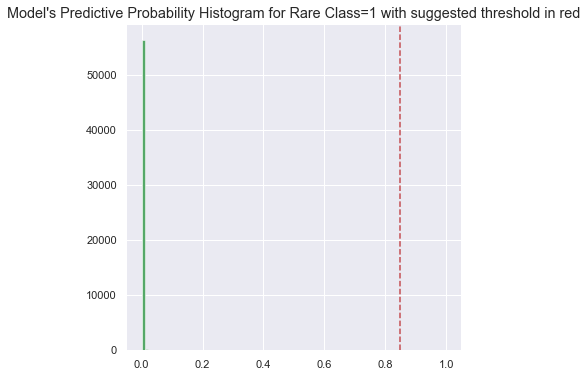

    Using threshold=0.5. However, 0.850 provides better F1=0.84 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 99.9%
Balanced Accuracy = 89.79% with Threshold = 0.50
Confusion Matrix:
[[56853    11]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Balanced Accuracy = 88.77% with Threshold = 0.85
Confusion Matrix:
[[56858     6]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96    

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 493
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    class_weights = [ 0.05008652 28.94380081]
    class_weighted_rows = {0: 284315, 1: 14240}
Training model now on resampled train data: (298555, 22). This will take time...
    Resampled data Training time taken = 200 seconds
##################  Completed Imbalanced Training using XGBClassifier ################
     Actual Training time t

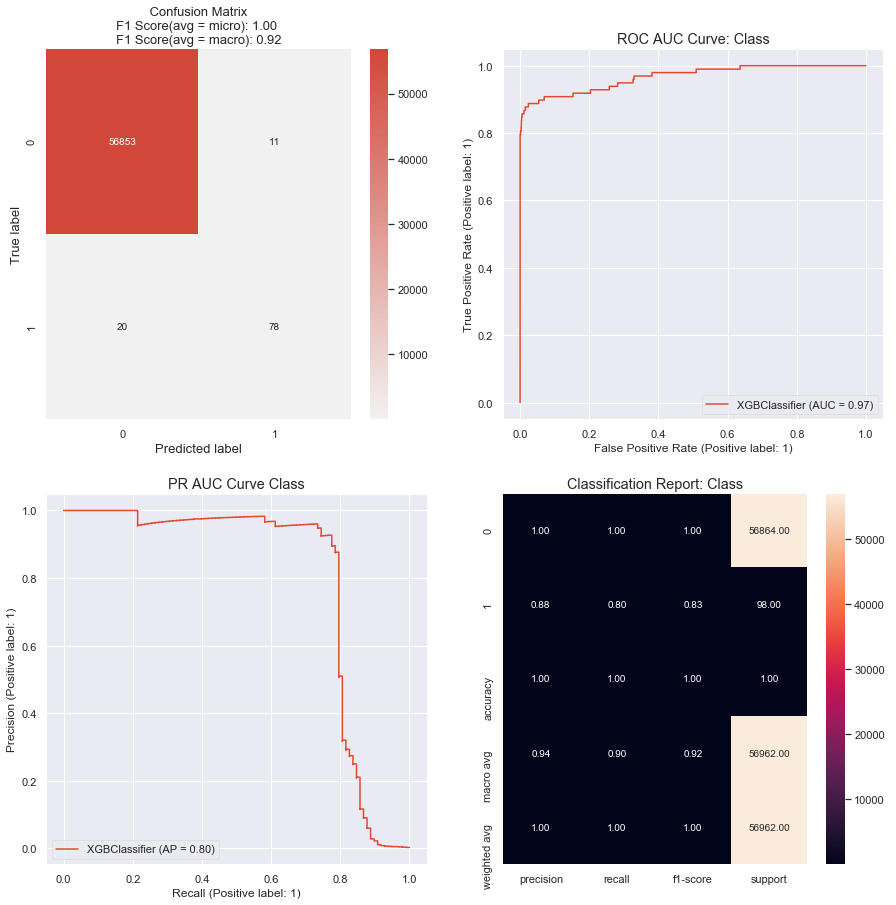

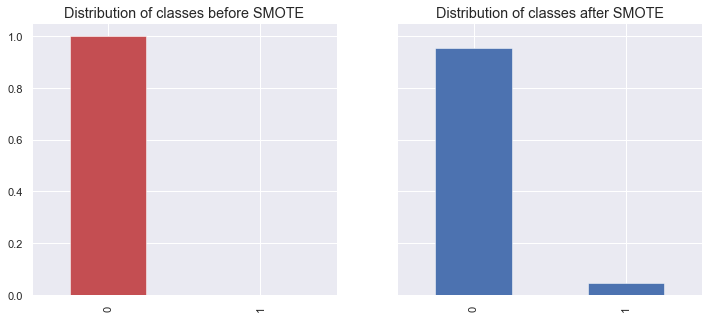

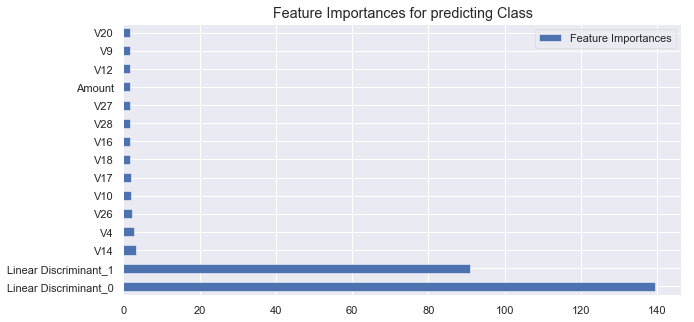

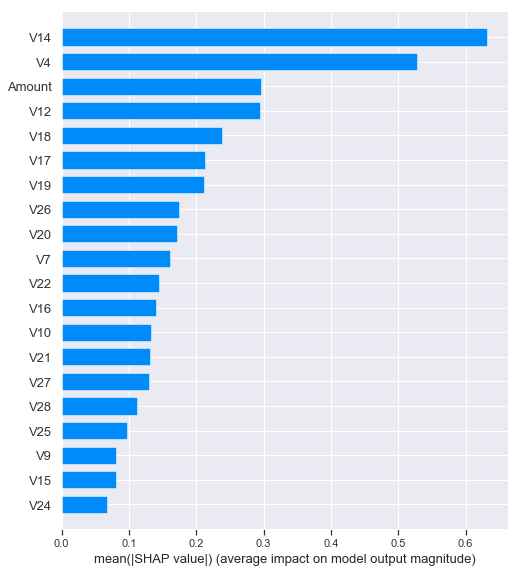

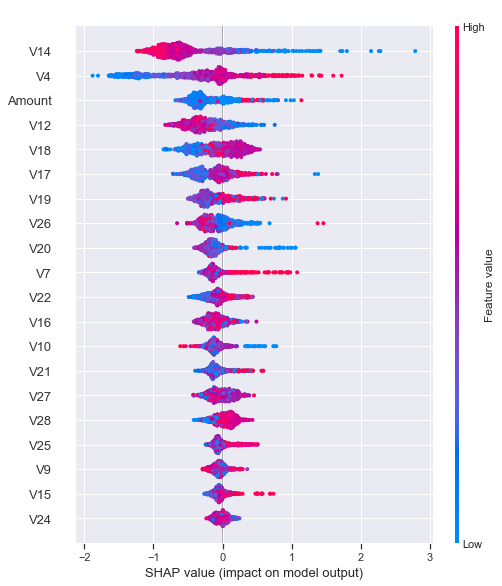

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 835
Writing Output files to disk...
    Saving predictions to .\Class\Class_Binary_Classification_test_modified.csv
    Saving predictions to .\Class\Class_Binary_Classification_submission.csv
    Saving predictions to .\Class\Class_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 15.1 for the Entire Process


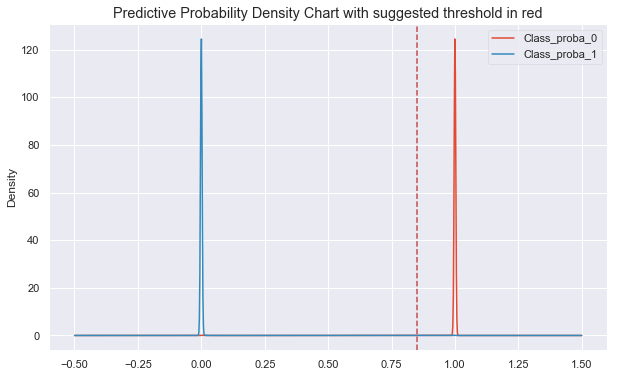

In [5]:
from autoviml.Auto_ViML import Auto_ViML

model, features, trainm, testm = Auto_ViML(
    train=df,
    target="Class",
    test="",
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3
)